In [1]:
import pandas as pd
import numpy as np
import graphviz as gr
import statsmodels.formula.api as smf

## Strict Exogeneity

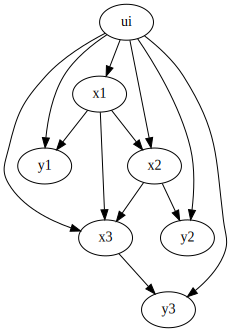

In [2]:
g = gr.Digraph()

g.edge("ui", "y1")
g.edge("ui", "y2")
g.edge("ui", "y3")

g.edge("ui", "x1")
g.edge("ui", "x2")
g.edge("ui", "x3")

g.edge("x1", "y1")
g.edge("x2", "y2")
g.edge("x3", "y3")

g.edge("x1", "x2")
g.edge("x1", "x3")
g.edge("x2", "x3")

g

In [3]:
np.random.seed(123)
n = 1000

ui = np.random.normal(0, 1, n)
unit = np.array(range(n))

x1 = np.random.normal(ui, 1, n)
y1 = np.random.normal(x1+ui, 1, n)

x2 = np.random.normal(ui+x1, 1, n)
y2 = np.random.normal(x2+ui, 1, n)

x3 = np.random.normal(ui+x1+x2, 1, n)
y3 = np.random.normal(x3+ui, 1, n)

df = pd.concat([
    pd.DataFrame(dict(y=y1, x=x1, t=1, i=unit)),
    pd.DataFrame(dict(y=y2, x=x2, t=2, i=unit)),
    pd.DataFrame(dict(y=y3, x=x3, t=3, i=unit)),
])

In [4]:
m = smf.ols("y~x", data=df).fit()
m.params["x"]

1.2468951265336887

In [5]:
m = smf.ols("y~x+C(i)", data=df).fit()
m.params["x"]

1.0212359462523348

## Feedback

$$
Y_{it-1} \rightarrow X_{it}
$$

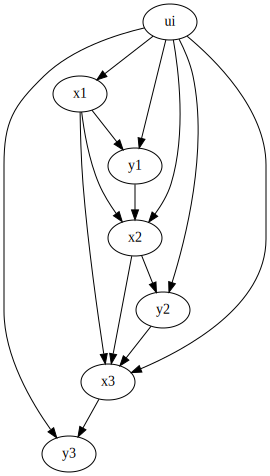

In [6]:
g = gr.Digraph()

g.edge("ui", "y1")
g.edge("ui", "y2")
g.edge("ui", "y3")

g.edge("ui", "x1")
g.edge("ui", "x2")
g.edge("ui", "x3")

g.edge("x1", "y1")
g.edge("x2", "y2")
g.edge("x3", "y3")

g.edge("x1", "x2")
g.edge("x1", "x3")
g.edge("x2", "x3")


g.edge("y1", "x2")
g.edge("y2", "x3")

g

In [7]:
np.random.seed(123)

n = 1000

ui = np.random.normal(0, 1, n)
unit = np.array(range(n))

x1 = np.random.normal(ui, 1, n)
y1 = np.random.normal(x1+ui, 1, n)

x2 = np.random.normal(ui+x1+y1, 1, n)
y2 = np.random.normal(x2+ui, 1, n)

x3 = np.random.normal(ui+x2+y1+y2, 1, n)
y3 = np.random.normal(x3+ui, 1, n)

df = pd.concat([
    pd.DataFrame(dict(y=y1, x=x1, t=1, i=unit, ui=ui)),
    pd.DataFrame(dict(y=y2, x=x2, t=2, i=unit, ui=ui)),
    pd.DataFrame(dict(y=y3, x=x3, t=3, i=unit, ui=ui)),
])

In [8]:
m = smf.ols("y~x+C(i)", data=df).fit()
m.params["x"]

0.9862243767610324

Expanding a residual $e_{it}$ on $Y_{it}$

## Carryover

$$
X_{it-1} \rightarrow Y_{it}
$$

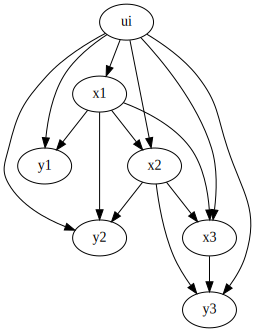

In [9]:
g = gr.Digraph()

g.edge("ui", "y1")
g.edge("ui", "y2")
g.edge("ui", "y3")

g.edge("ui", "x1")
g.edge("ui", "x2")
g.edge("ui", "x3")

g.edge("x1", "y1")
g.edge("x2", "y2")
g.edge("x3", "y3")

g.edge("x1", "x2")
g.edge("x1", "x3")
g.edge("x2", "x3")


g.edge("x1", "y2")
g.edge("x2", "y3")

g

In [10]:
np.random.seed(123)

n = 1000

ui = np.random.normal(0, 1, n)
unit = np.array(range(n))

x1 = np.random.normal(ui, 1, n)
y1 = np.random.normal(x1+ui, 1, n)

x2 = np.random.normal(ui+x1, 1, n)
y2 = np.random.normal(x2+x1+ui, 1, n)

x3 = np.random.normal(ui+x1+x2, 1, n)
y3 = np.random.normal(x2+x3+ui, 1, n)

df = pd.concat([
    pd.DataFrame(dict(y=y1, x=x1, t=1, i=unit, ui=ui)),
    pd.DataFrame(dict(y=y2, x=x2, t=2, i=unit, ui=ui)),
    pd.DataFrame(dict(y=y3, x=x3, t=3, i=unit, ui=ui)),
])

In [11]:
m = smf.ols("y~x+C(i)", data=df).fit()
m.params["x"]

1.5592315346170307

In [12]:
m = smf.ols("y~x+x_minus1+C(i)",
            data=df.assign(x_minus1 = df.groupby("i")["x"].shift(1))).fit()

m.params["x"]

1.0258800114132918